## Analysis of bike rental data
The dataset contains bike rides data from 1-Jan-2011 to 31-Dec-2012 in Washington with information on weather conditions, day of week, holidays etc.

Questions analyzed:
1. Is there a correlation between the temperature and the number of bike rentals?
2. Is there any relationship between other weather conditions (humidity and wind speed) and the number of bike rentals?
3. How do general weather conditions affect the number of rides?
4. How does the number of bike rides change throughout the year, with split for registered and non-registered customers?
5. Are there more rides during working days or on the weekends?


Source of data: https://www.kaggle.com/datasets/archit9406/bike-sharing?select=day.csv

The values in numerical columns are normalized.

In [2294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2318]:
df = pd.read_csv('https://raw.githubusercontent.com/Pola6/data-analysis-bike-rental/master/bike_rental_dataset_day.csv')
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [2296]:
df.shape

(731, 16)

### Data preparation
Change column names and replace content of cells with more decriptive data.

In [2297]:
df.columns = ['Record number', 'Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Working day', 'Weather',
'Temperature', 'Feeling temperature', 'Humidity', 'Wind speed', 'Non-registered customers', 'Registered customers', 'Total customers']
df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Season'].replace([1, 2, 3, 4], ['winter','spring', 'summer', 'fall'])
df['Year'] = df['Year'].replace([0, 1], [2011, 2012])
df['Holiday'] = df['Holiday'].replace([0, 1], ['non-holiday', 'holiday'])
df['Weekday'] = df['Weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
df['Working day'] = df['Working day'].replace([0, 1], ['weekend or holiday', 'working day'])
df['Weather'] = df['Weather'].replace(
    {1: '1 - Clear, partly cloudy',
    2: '2 - Cloudy, Mist',
    3: '3- Rain, snow, clouds',
    }
)
df.head(3)

,Record number,Date,Season,Year,Month,Holiday,Weekday,Working day,Weather,Temperature,Feeling temperature,Humidity,Wind speed,Non-registered customers,Registered customers,Total customers
0,1,2011-01-01,winter,2011,1,non-holiday,Sat,weekend or holiday,"2 - Cloudy, Mist",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,winter,2011,1,non-holiday,Sun,weekend or holiday,"2 - Cloudy, Mist",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,winter,2011,1,non-holiday,Mon,working day,"1 - Clear, partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349


Check if all content is valid and there are no additional entries outside of range

In [2298]:
for name, values in df[['Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Working day', 'Weather']].iteritems():
    print(name, df[name].unique())

Season ['winter' 'spring' 'summer' 'fall']
Year [2011 2012]
Month [ 1  2  3  4  5  6  7  8  9 10 11 12]
Holiday ['non-holiday' 'holiday']
Weekday ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
Working day ['weekend or holiday' 'working day']
Weather ['2 - Cloudy, Mist' '1 - Clear, partly cloudy' '3- Rain, snow, clouds']


Check for any NaN values

In [2299]:
df.isnull().values.any()

False

Check if the total column matches the number of registered and non-registered customers

In [2300]:
df['Calculated total'] = df['Non-registered customers'] + df['Registered customers']
(df['Calculated total'] == df['Total customers']).unique()

array([ True])

In [2301]:
df.drop(columns=['Calculated total'], axis=1, inplace=True)

Check data types

In [2302]:
df.dtypes

Record number                        int64
Date                        datetime64[ns]
Season                              object
Year                                 int64
Month                                int64
Holiday                             object
Weekday                             object
Working day                         object
Weather                             object
Temperature                        float64
Feeling temperature                float64
Humidity                           float64
Wind speed                         float64
Non-registered customers             int64
Registered customers                 int64
Total customers                      int64
dtype: object

Check for outliers in numerical columns. There don't seem to be any outlier values and the data for normalized columns is in range 0-1.

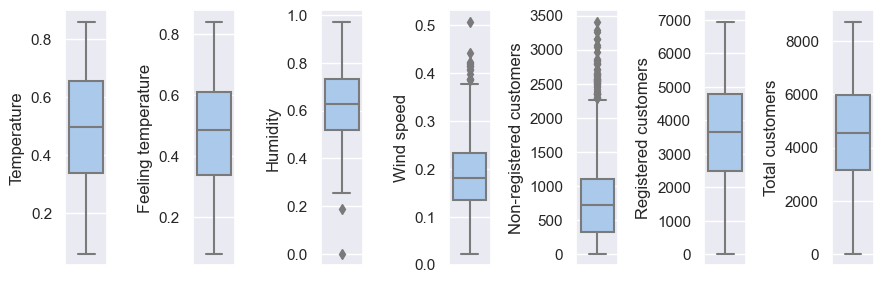

In [2303]:
fig, axes = plt.subplots(ncols=7, figsize=(9,3))
sns.boxplot(y=df['Temperature'], data=df, ax=axes[0])
sns.boxplot(y=df['Feeling temperature'], data=df, ax=axes[1])
sns.boxplot(y=df['Humidity'], data=df, ax=axes[2])
sns.boxplot(y=df['Wind speed'], data=df, ax=axes[3])
sns.boxplot(y=df['Non-registered customers'], data=df, ax=axes[4])
sns.boxplot(y=df['Registered customers'], data=df, ax=axes[5])
sns.boxplot(y=df['Total customers'], data=df, ax=axes[6])
fig.tight_layout()

### Data analysis
#### 1) Is there a correlation between the temperature and the number of bike rentals?

There is a relationship between the temperature and the number of bike rentals. Pearson correlation coefficient in range 0.5-0.7 is generally interpreted as a moderate relationship.

In [2304]:
df.corr().loc[['Temperature', 'Feeling temperature'], ['Total customers', 'Non-registered customers', 'Registered customers']].style.format("{:.2}")

,Total customers,Non-registered customers,Registered customers
Temperature,0.63,0.54,0.54
Feeling temperature,0.63,0.54,0.54


<AxesSubplot:xlabel='Feeling temperature', ylabel='Total customers'>

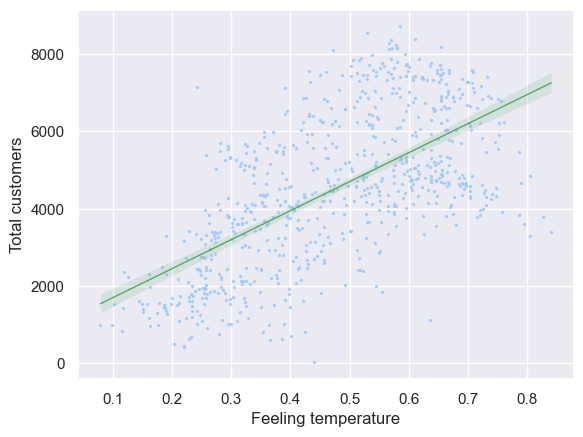

In [2305]:
sns.regplot(data=df,  x='Feeling temperature', y='Total customers', scatter_kws={'s': 2}, line_kws={'color': 'g', 'linewidth': 1})

#### 2) Is there any relationship between other weather conditions (humidity and wind speed) and the number of bike rentals?

The plots show that other weather conditions don't affect the number of rides. The coefficient is below 0.3, meaning no relationship.

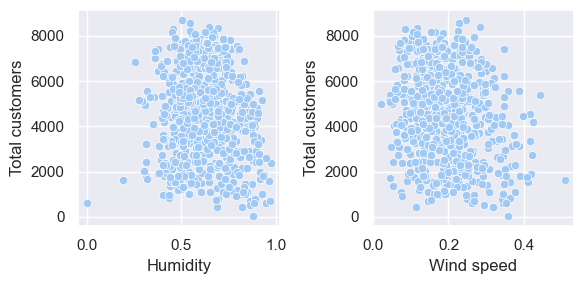

In [2306]:
fig, axes = plt.subplots(ncols=2, figsize=(6,3))
sns.scatterplot(data=df,  x='Humidity', y='Total customers', ax=axes[0])
sns.scatterplot(data=df,  x='Wind speed', y='Total customers', ax=axes[1])
fig.tight_layout()

In [2307]:
df.corr().loc[['Humidity', 'Wind speed'], ['Total customers', 'Non-registered customers', 'Registered customers']].style.format("{:.2}")

,Total customers,Non-registered customers,Registered customers
Humidity,-0.1,-0.077,-0.091
Wind speed,-0.23,-0.17,-0.22


#### 3) How do general weather conditions affect the number of rides?

The most rides take place at clear weather, a little less when it is cloudy and the number of rides decreases significantly when there is rain or snow.

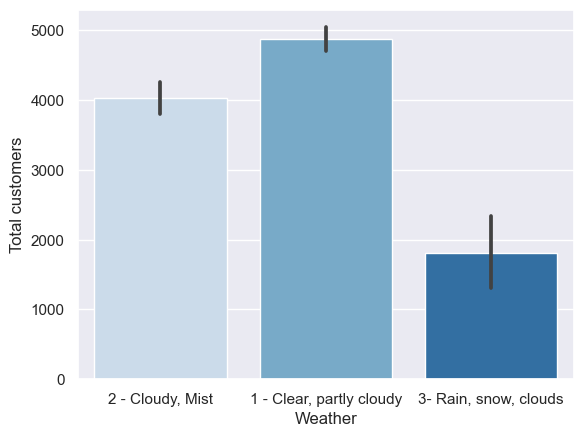

In [2308]:
ax = sns.barplot(data=df,  x='Weather', y='Total customers', palette='Blues')


#### 4) How does the number of bike rides change throughout the year, with split for registered and non-registered customers?

The highest number of rides takes place from June to September. January and February are the months with the lowest number of rides.


Text(0, 0.5, 'Number of customers')

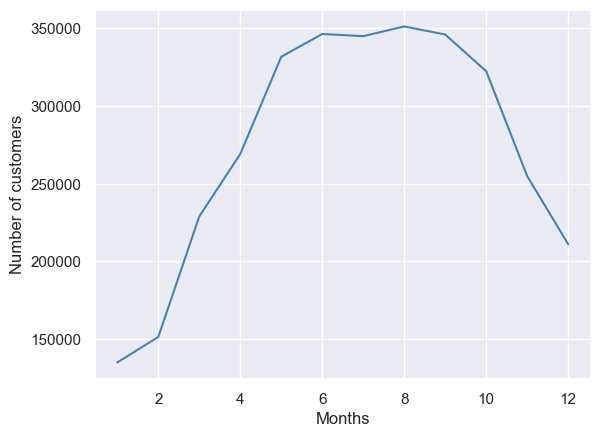

In [2309]:
sum_customers_month = df.pivot_table(['Registered customers', 'Non-registered customers', 'Total customers'], index='Month', aggfunc='sum')
sns.lineplot(x=sum_customers_month.index,  y="Total customers", data=sum_customers_month, color='steelblue')
plt.xlabel('Months')
plt.ylabel('Number of customers')

To see the split for registered and non-registered customers, the percentage is calculated. It can be seen that in the warmer half of year (April-September) the percentage of non-registered customers increases. During the other, colder half of year almost all rides are taken by registered customers.

In [2310]:
sum_customers_month["Total percent"] = 1.0
sum_customers_month["Percent registered"] = sum_customers_month['Registered customers'] / sum_customers_month['Total customers']

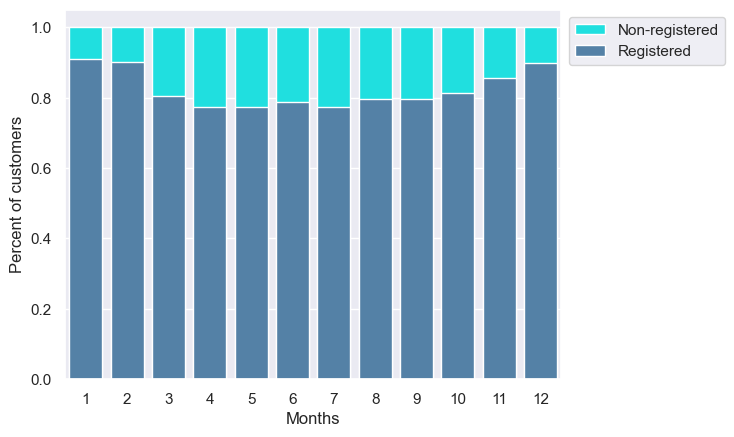

In [2311]:
sns.barplot(x=sum_customers_month.index,  y="Total percent", data=sum_customers_month, color='cyan', label='Non-registered')
sns.barplot(x=sum_customers_month.index,  y="Percent registered", data=sum_customers_month, color='steelblue', label='Registered')
plt.xlabel('Months')
plt.ylabel('Percent of customers')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

Looking at the seasons, the most rides take place in summer, which matches the monthly results.

Text(0, 0.5, 'Number of customers')

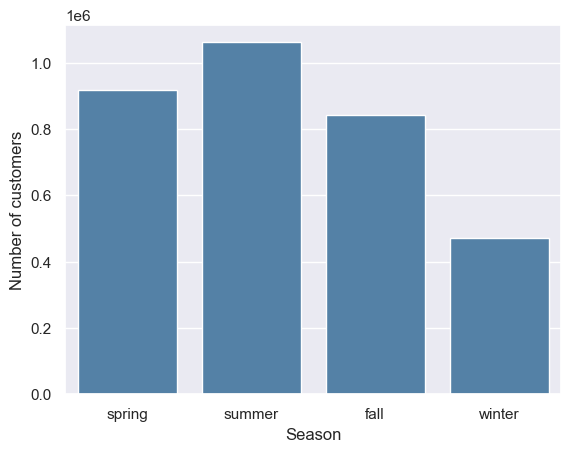

In [2312]:
sum_customers_season = df.pivot_table(['Total customers'], index='Season', aggfunc='sum')
sns.barplot(x=sum_customers_season.index,  y="Total customers", data=sum_customers_season, color='steelblue', order=['spring', 'summer', 'fall', 'winter'])
plt.xlabel('Season')
plt.ylabel('Number of customers')

#### 5) Are there more rides during working days or on the weekends?

The day of a week almost does not affect the number of bike rides. There is a very small increase of demand on Thursdays and Fridays and a small decrease on Sundays.

Text(0, 0.5, 'Number of customers')

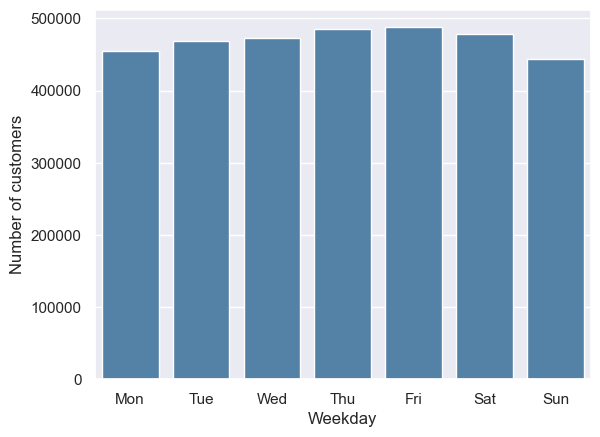

In [2313]:
sum_customers_weekdays = df.pivot_table(['Registered customers', 'Non-registered customers', 'Total customers'], index='Weekday', aggfunc='sum')
sns.barplot(x=sum_customers_weekdays.index,  y="Total customers", data=sum_customers_weekdays, color='steelblue', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday')
plt.ylabel('Number of customers')

The proportion of non-registered customers increases on Saturdays and Sundays.

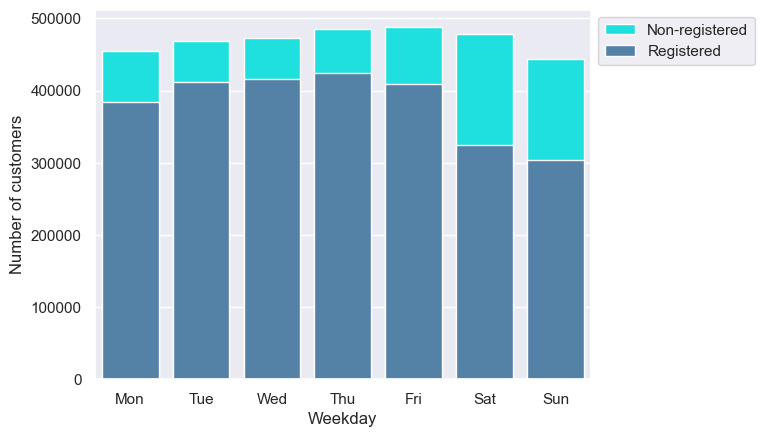

In [2314]:
sns.barplot(x=sum_customers_weekdays.index,  y="Total customers", data=sum_customers_weekdays, color='cyan', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], label='Non-registered')
sns.barplot(x=sum_customers_weekdays.index,  y="Registered customers", data=sum_customers_weekdays, color='steelblue', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], label='Registered')
plt.xlabel('Weekday')
plt.ylabel('Number of customers')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#### Conclusion: 

The temperature and the time of year have the biggest impact on the number of rides taken. The highest number of rides takes place in summer season, in months June-September. Humidity and wind speed have no impact on the rides.

During cold months (Oct-Mar) most of the customers are registered customers and the proportion of non-registered customers increases in warmer months (Apr-Sep).

The total number of rides doesn't vary much depending on the day of a week. On weekends the percentage of non-registered customers increases. 